In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from scipy.spatial import ConvexHull
from sklearn.neighbors import LocalOutlierFactor

In [2]:
def generate(x0, y0, r, num = 1000):
    theta = np.linspace(0, 2 * np.pi, num = num)
    x = r * np.cos(theta) + x0
    y = r * np.sin(theta) + y0
    return x, y

def taubin_circle_fit(x, y):
    # Fit a circle to (x, y) points using the Taubin method

    A = np.stack([x, y, np.ones_like(x)], axis = 1)
    b = x ** 2 + y ** 2
    out, _, _, _ = np.linalg.lstsq(A, b, rcond = None)

    x0 = out[0] / 2
    y0 = out[1] / 2
    r = np.sqrt(out[2] + x0 ** 2 + y0 ** 2)
    return x0, y0, r

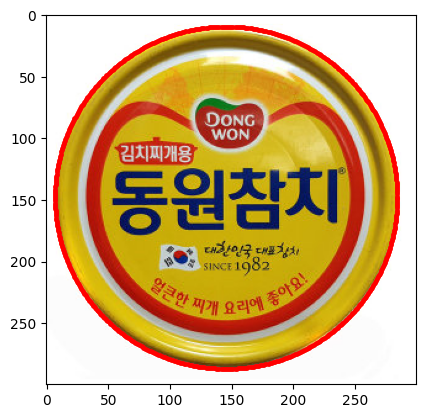

In [3]:
paths = glob('data/*')

img = cv2.imread(paths[4])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

canny = cv2.Canny(gray, 50, 150)
y, x = np.where(canny == 255)
xy = np.stack([x, y], axis = 1)

hull = ConvexHull(points = xy)
xy = xy[np.unique(hull.simplices)]

p = LocalOutlierFactor(n_neighbors = 10).fit_predict(xy)
xy = xy[np.where(p == 1)]
x, y = xy.T

x0, y0, r = taubin_circle_fit(x, y)

plt.imshow(img)
plt.scatter(*generate(x0, y0, r), s = 5, color = 'r')
plt.show()

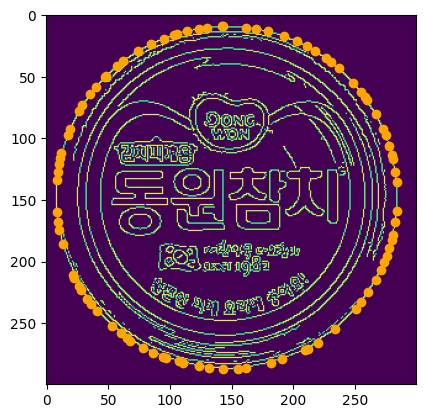

In [4]:
plt.imshow(canny)
plt.scatter(x, y, color = 'orange')
plt.show()